In [168]:
# Packages which we will use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
# Importing our dataset
data = pd.read_csv('1000_songs.csv')

In [170]:
data.head()

,THEME,TITLE,ARTIST,YEAR,SPOTIFY_URL
0,Love,The Look of Love,ABC,1982,http://open.spotify.com/track/78j3qTBdzcIiT3eS...
1,Love,The Shining,Badly Drawn Boy,2000,http://open.spotify.com/track/2PojSoZ94AIzp7fs...
2,Love,God Only Knows,The Beach Boys,1966,http://open.spotify.com/track/0ObrXLrfrqJUNc8R...
3,Love,Good Vibrations,The Beach Boys,1966,http://open.spotify.com/track/2oF7FZHIJbzjeEXZ...
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966,http://open.spotify.com/track/0cx32rX0uZvcJUP9...


In [171]:
# How much of our data is missing
data.isnull().sum()

THEME            0
TITLE            0
ARTIST           0
YEAR             0
SPOTIFY_URL    222
dtype: int64

In [172]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   THEME        994 non-null    object
 1   TITLE        994 non-null    object
 2   ARTIST       994 non-null    object
 3   YEAR         994 non-null    int64 
 4   SPOTIFY_URL  772 non-null    object
dtypes: int64(1), object(4)
memory usage: 39.0+ KB


,YEAR
count,994.000000
mean,1978.058350
std,15.616006
min,1916.000000
25%,1968.000000
50%,1977.000000
75%,1988.000000
max,2008.000000


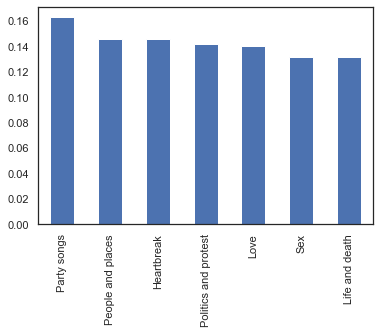

In [173]:
# Simply based on the describe funcition, we can see the king (Dylan, of course) is righfully on top of the list.

# Finding the top theme
data['THEME'].value_counts()

data['THEME'].value_counts(normalize=True).plot(kind='bar');

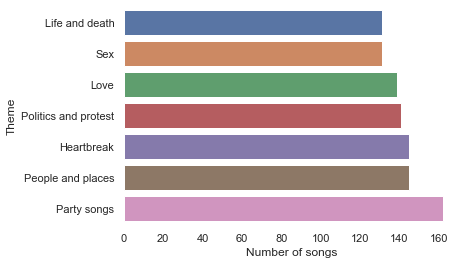

In [174]:
ax = sns.countplot(y='THEME',data=data,order=data['THEME'].value_counts(ascending=True).index)

ax.set_xlabel('Number of songs')
ax.set_ylabel('Theme')

sns.despine(left=True,bottom=True,right=True)

AxesSubplot(0.125,0.125;0.775x0.755)


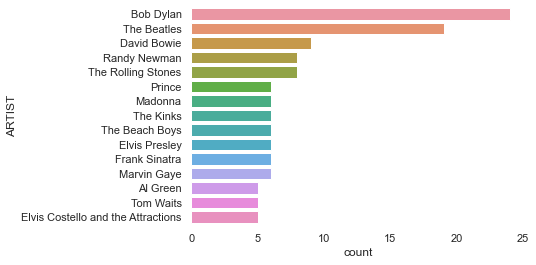

In [175]:
# Finding the top artist

sns.set(style='white')

ax = sns.countplot(y=data['ARTIST'],data=data,order=data['ARTIST'].value_counts(ascending=False)[:15].index)

sns.despine(left=True,bottom=True,right=True)

print(ax)

In [176]:
data.head()

,THEME,TITLE,ARTIST,YEAR,SPOTIFY_URL
0,Love,The Look of Love,ABC,1982,http://open.spotify.com/track/78j3qTBdzcIiT3eS...
1,Love,The Shining,Badly Drawn Boy,2000,http://open.spotify.com/track/2PojSoZ94AIzp7fs...
2,Love,God Only Knows,The Beach Boys,1966,http://open.spotify.com/track/0ObrXLrfrqJUNc8R...
3,Love,Good Vibrations,The Beach Boys,1966,http://open.spotify.com/track/2oF7FZHIJbzjeEXZ...
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966,http://open.spotify.com/track/0cx32rX0uZvcJUP9...


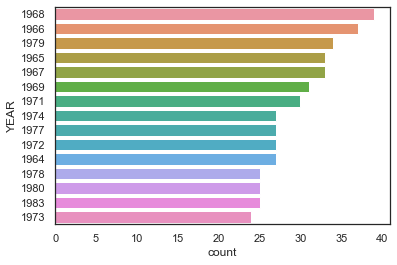

In [177]:
# Finding the top years for music:

ax = sns.countplot(y=data['YEAR'],data=data,order=data['YEAR'].value_counts(ascending=False).index[:15])

In [178]:
# Finding the top decades:

decades = []
for i in range(0,11):
    new_d = 1910 + 10*i
    decades.append(new_d)
    
for values in data['YEAR']:
    values = int(values)
    
top_decades = pd.cut(data["YEAR"], decades).value_counts()
top_decades

(1960, 1970]    261
(1970, 1980]    260
(1980, 1990]    181
(1990, 2000]    110
(2000, 2010]    106
(1950, 1960]     45
(1930, 1940]     12
(1940, 1950]      9
(1920, 1930]      9
(1910, 1920]      1
Name: YEAR, dtype: int64

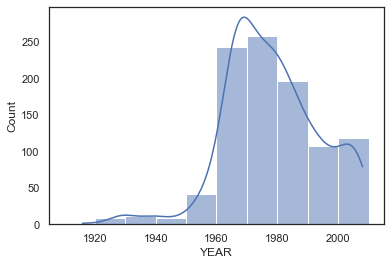

In [182]:
sns.histplot(data=data['YEAR'],bins=decades,kde=True);

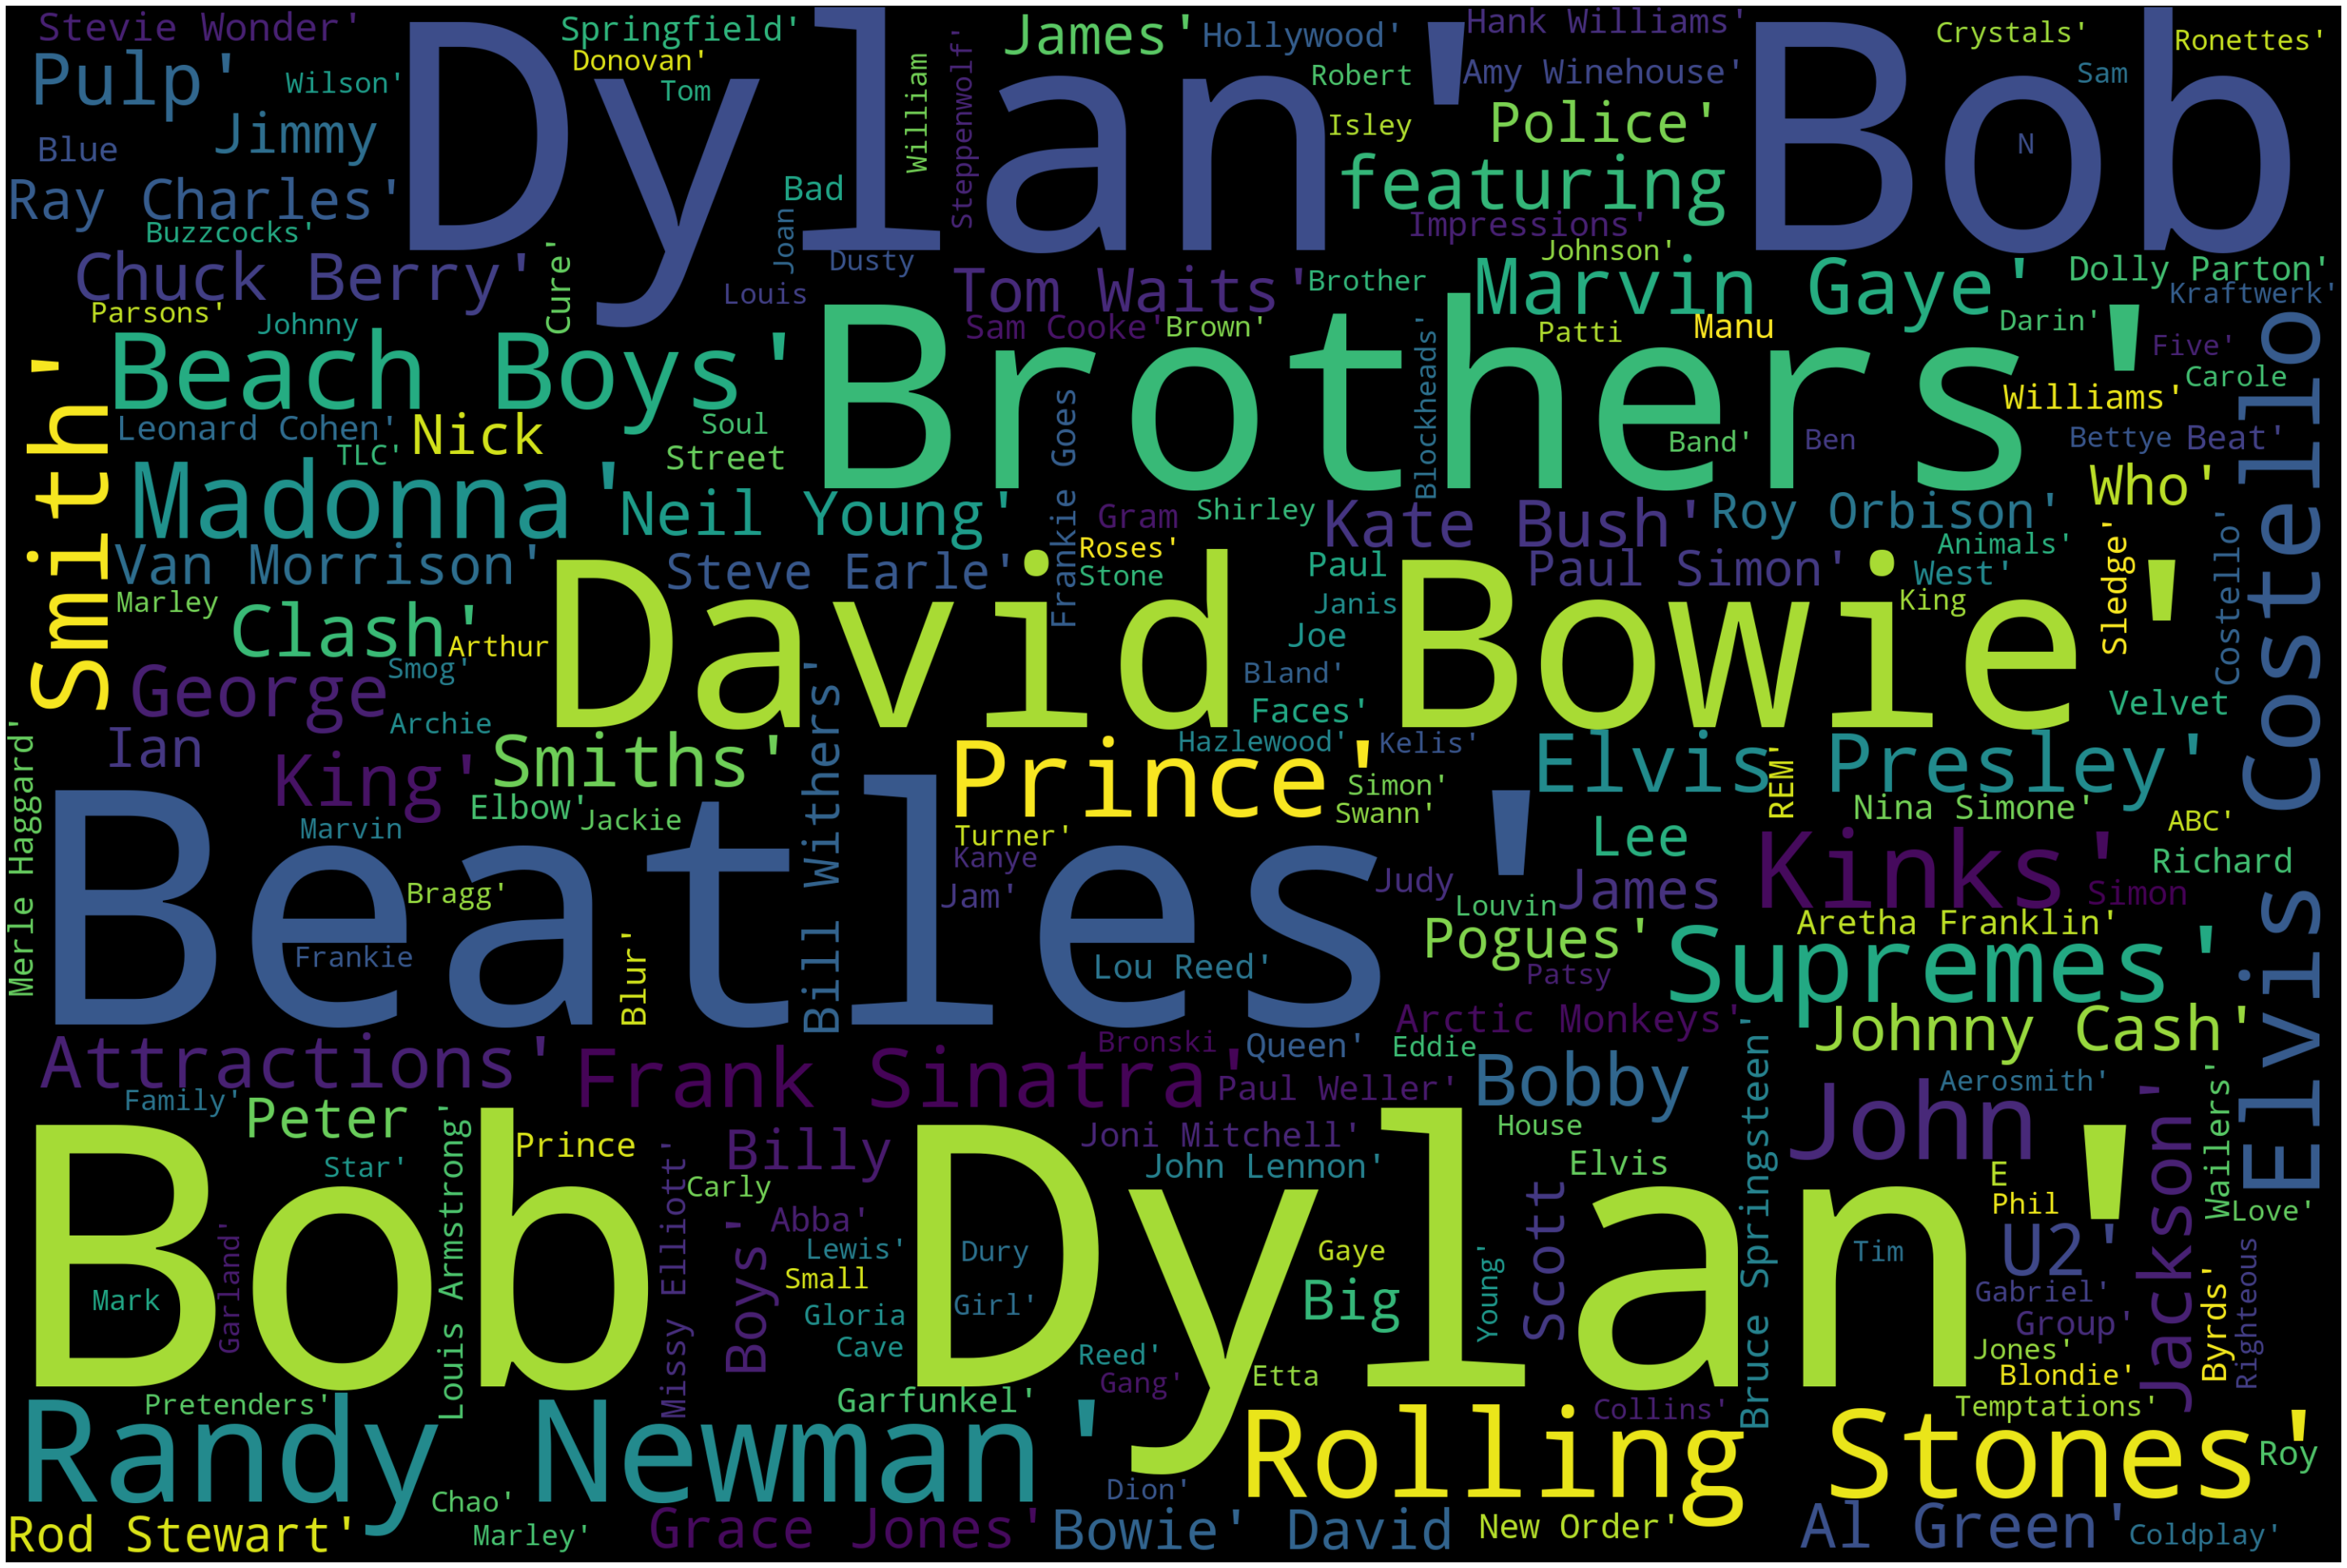

In [190]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
title_values = data['ARTIST'].str.strip().str.replace("['´’]","").values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(title_values))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
